## Bayes classifier-Unimodal Gaussian density 
#### Covariance matrix for all the classes is the same and is σ2I 

In [ ]:
import numpy as np

train_data = np.loadtxt(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\linearlySeparable\combined_dataset_train.txt")
test_data = np.loadtxt(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\linearlySeparable\combined_dataset_test.txt")
val_data = np.loadtxt(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\linearlySeparable\comb_dataset_val.txt")

X_train, y_train = train_data[:, :2], train_data[:, 2]
X_test, y_test = test_data[:, :2], test_data[:, 2]
X_val, y_val = val_data[:, :2], val_data[:, 2]

class_means = {}
for class_label in np.unique(y_train):
    class_means[class_label] = X_train[y_train == class_label].mean(axis=0)

#Calculate the shared variance (σ²)
variances = [np.var(X_train[y_train == class_label], axis=0) for class_label in np.unique(y_train)]
avg_variance = np.mean(variances)  # σ²
cov_matrix = avg_variance * np.identity(2)  # σ²I

def gaussian_density(x, mean, cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    diff = x - mean
    return np.exp(-0.5 * diff.T @ inv_cov @ diff) / np.sqrt((2 * np.pi) ** 2 * np.linalg.det(cov_matrix))
def predict(X):
    predictions = []
    for x in X:
        class_probs = {class_label: gaussian_density(x, class_means[class_label], cov_matrix) for class_label in class_means}
        predictions.append(max(class_probs, key=class_probs.get))
    return np.array(predictions)
val_predictions = predict(X_val)
test_predictions = predict(X_test)
val_accuracy = np.mean(val_predictions == y_val)
test_accuracy = np.mean(test_predictions == y_test)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Validation Accuracy: 100.00%
Test Accuracy: 100.00%


### Plotting the results

#### Decision region plot for all the classes together with the training data superposed 

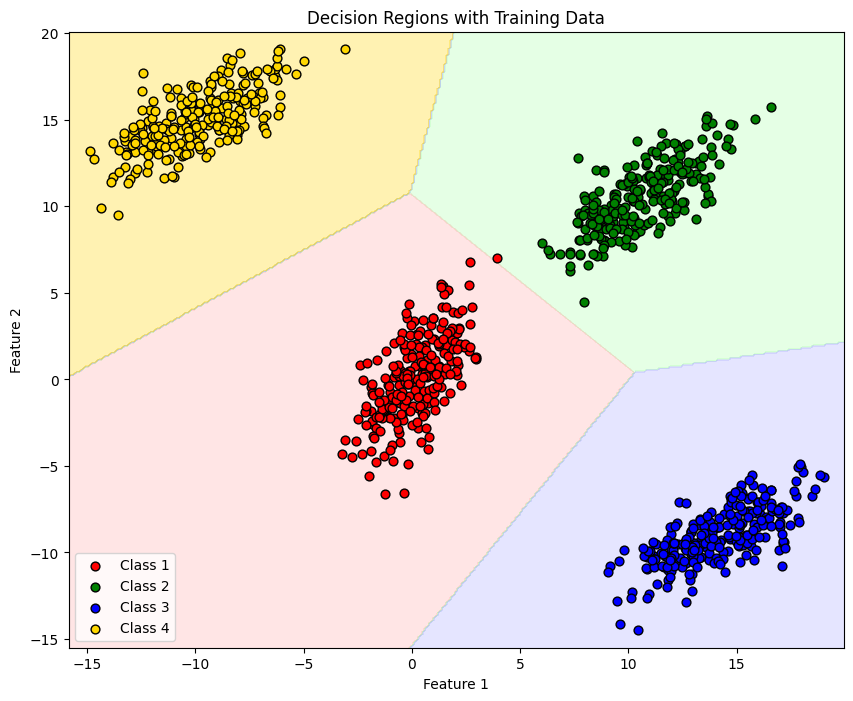

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, class_means, cov_matrix, resolution=0.1):

    colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

    # Plot the training points
    scatter_colors = ['red', 'green', 'blue', 'gold']
    for idx, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1],
                    c=scatter_colors[idx], label=f'Class {int(class_label)}', edgecolor='k', s=40)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title("Decision Regions with Training Data")
    plt.show()

plot_decision_regions(X_train, y_train, class_means, cov_matrix, resolution=0.1)  # Increase resolution for faster results


##### Decision region plot for all the classes together with the testing data superimposed 


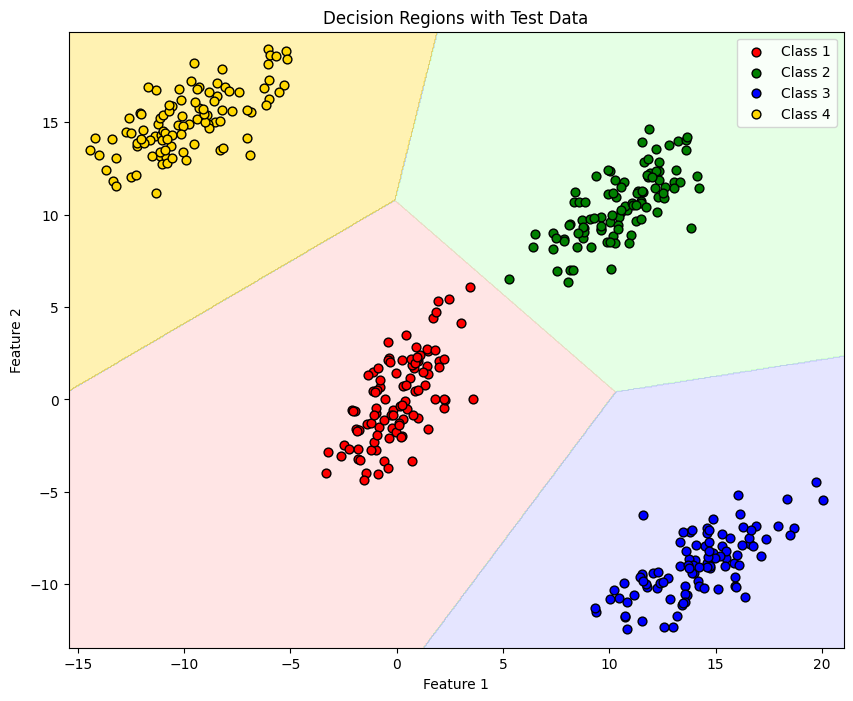

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, class_means, cov_matrix, resolution=0.1):
    colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

    # Plot the training points
    scatter_colors = ['red', 'green', 'blue', 'gold']
    for idx, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1],
                    c=scatter_colors[idx], label=f'Class {int(class_label)}', edgecolor='k', s=40)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title("Decision Regions with Test Data")
    plt.show()

plot_decision_regions(X_test, y_test, class_means, cov_matrix, resolution=0.05)  # Increase resolution for faster results


#### Decision region plot for every pair of classes with the respective training data superimposed

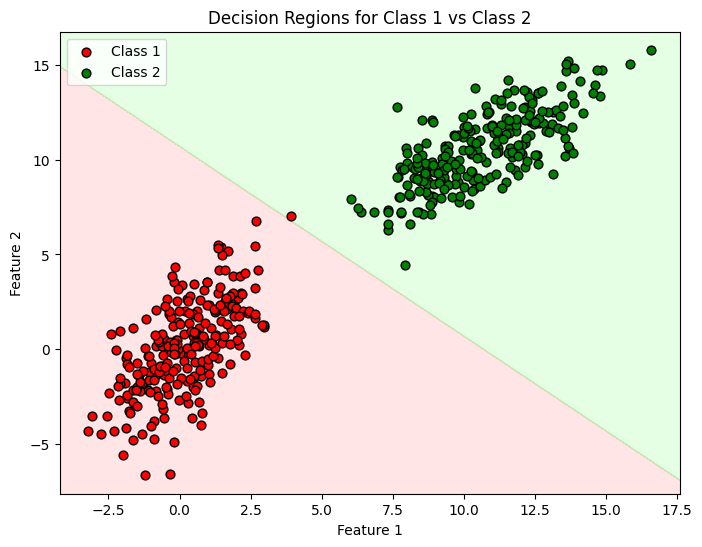

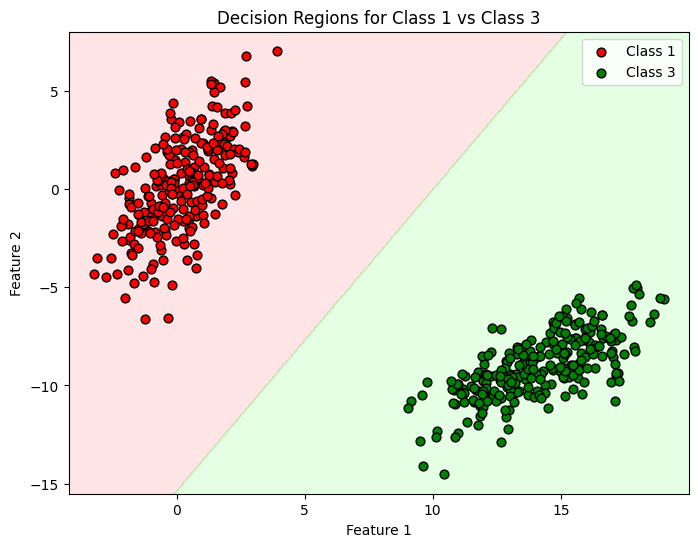

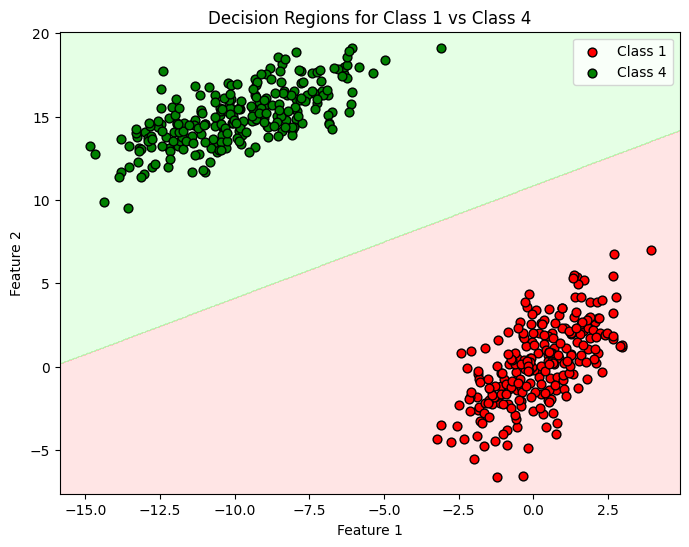

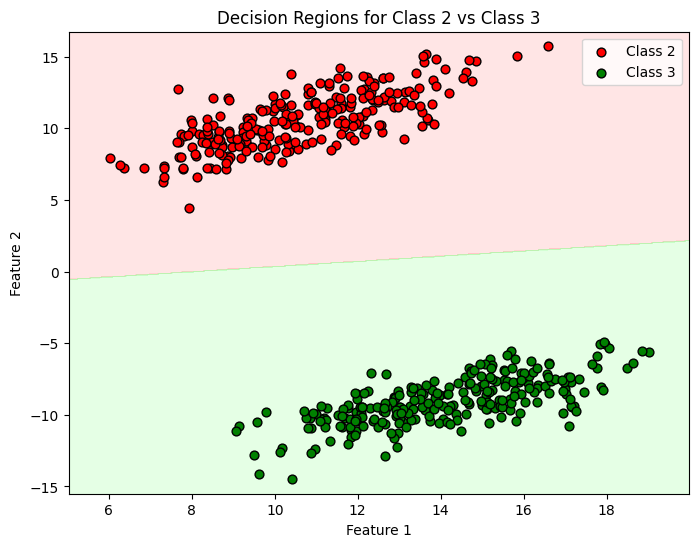

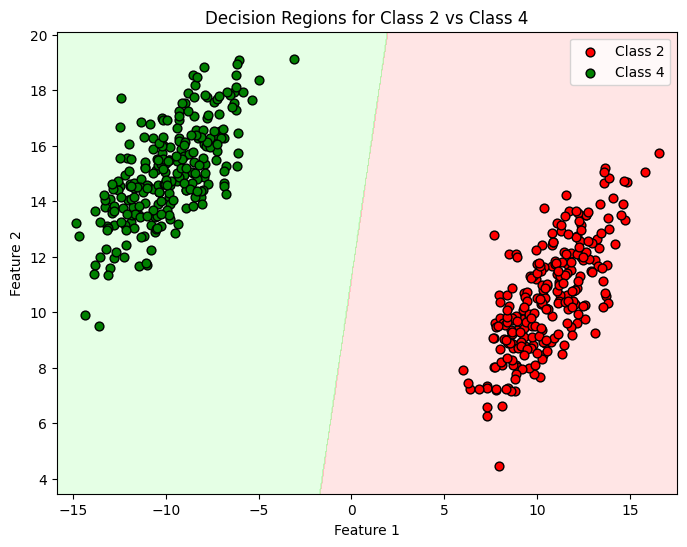

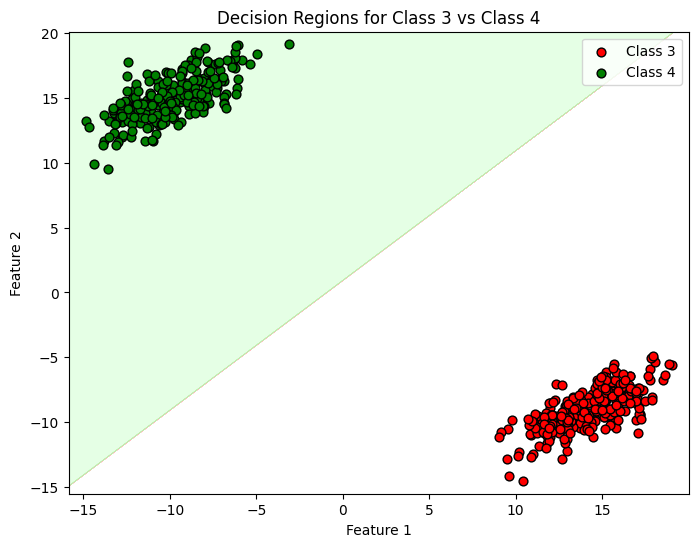

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def gaussian_density_vectorized(X, mean, cov_inv, cov_det):
    diff = X - mean
    exponent = -0.5 * np.sum((diff @ cov_inv) * diff, axis=1)
    return (1 / (2 * np.pi * np.sqrt(cov_det))) * np.exp(exponent)

def plot_decision_regions_for_class_pairs_optimized(X, y, class_means, cov_matrix, resolution=0.05):
    cov_inv = np.linalg.inv(cov_matrix)
    cov_det = np.linalg.det(cov_matrix)
    pair_colors = ['#FFAAAA', '#AAFFAA']
    cmap_pair = ListedColormap(pair_colors)
    classes = np.unique(y)
    num_classes = len(classes)
    for i in range(num_classes):
        for j in range(i + 1, num_classes):
            class_1, class_2 = classes[i], classes[j]
            indices = (y == class_1) | (y == class_2)
            X_pair = X[indices]
            y_pair = y[indices]
            means_pair = {class_1: class_means[class_1], class_2: class_means[class_2]}

            x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
            y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))
            grid_points = np.c_[xx.ravel(), yy.ravel()]

            density_class_1 = gaussian_density_vectorized(grid_points, means_pair[class_1], cov_inv, cov_det)
            density_class_2 = gaussian_density_vectorized(grid_points, means_pair[class_2], cov_inv, cov_det)

            Z = np.where(density_class_1 > density_class_2, class_1, class_2)
            Z = Z.reshape(xx.shape)
            plt.figure(figsize=(8, 6))
            plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_pair)

            scatter_colors = ['red', 'green']
            for idx, class_label in enumerate([class_1, class_2]):
                plt.scatter(X_pair[y_pair == class_label, 0], X_pair[y_pair == class_label, 1],
                            c=scatter_colors[idx], label=f'Class {int(class_label)}', edgecolor='k', s=40)

            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.legend()
            plt.title(f"Decision Regions for Class {int(class_1)} vs Class {int(class_2)}")
            plt.show()


plot_decision_regions_for_class_pairs_optimized(X_train, y_train, class_means, cov_matrix)


#### Evalutation metrics

Classification accuracy, precision for every class, mean precision, recall for every 
class, mean recall, F-measure for every class and mean F-measure on test data

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

test_predictions = predict(X_test)

accuracy = accuracy_score(y_test, test_predictions)

precision_per_class = precision_score(y_test, test_predictions, average=None)
recall_per_class = recall_score(y_test, test_predictions, average=None)
f1_per_class = f1_score(y_test, test_predictions, average=None)

mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1 = np.mean(f1_per_class)

results = pd.DataFrame({
    'Class': np.unique(y_test),
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F-Measure': f1_per_class
})

results.loc['Mean'] = ['Mean', mean_precision, mean_recall, mean_f1]

results = pd.concat([pd.DataFrame({'Class': ['Accuracy'], 'Precision': [accuracy], 'Recall': [np.nan], 'F-Measure': [np.nan]}), results], ignore_index=True)

print(results)


      Class  Precision  Recall  F-Measure
0  Accuracy        1.0     NaN        NaN
1       1.0        1.0     1.0        1.0
2       2.0        1.0     1.0        1.0
3       3.0        1.0     1.0        1.0
4       4.0        1.0     1.0        1.0
5      Mean        1.0     1.0        1.0


#### Confusion matrix based on the performance for test data. The entries in confusion matrix must be made in percentage. 

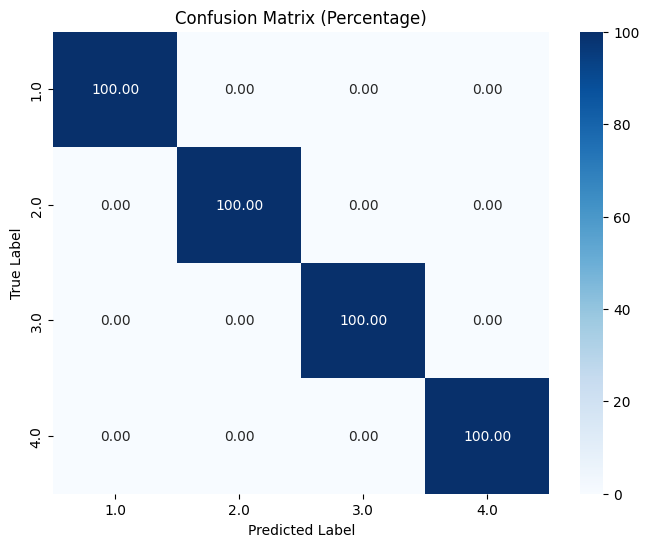

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_predictions = predict(X_test)

cm = confusion_matrix(y_test, test_predictions)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Percentage)')
plt.show()
